# Нейронки

## Функции активации

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def tahn(x, deriv = False):
    if deriv = True:
        
    return 2 / (1 + np.exp(-2*x)) - 1

def relu(x, deriv = False):
    arr = x > 0
    if deriv == True:
        return arr.astype(float)
    return arr.astype(float) * x

def l_relu(x, deriv = False):
    arr_1 = x > 0
    arr_2 = x <= 0
    if deriv == True:
        return arr_1.astype(float) - 0.01*arr_2.astype(float)
    return arr_1.astype(float) * x - 0.01*arr_2.astype(float)

    
def sigmoid(x, deriv = False):
    if deriv == True:
        return x*(1-x)
    return 1 / (1 + np.exp(-x))

## Простенький пример

Ответы
[[0]
 [1]
 [1]
 [0]]
Выход после тренировки
[[0.010671  ]
 [0.98630188]
 [0.98821939]
 [0.01593051]]


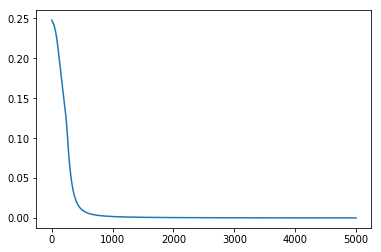

In [2]:
epochs = 5000

X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

np.random.seed(1)

inp0 = 2*np.random.random((3,4)) - 1
# print('Веса скрытого слоя')
# print(inp0)
inp1 = 2*np.random.random((4,1)) - 1
# print('Веса выходного слоя')
# print(inp1)
error = []
for i in range(epochs):
    l0 = X
    l1 = sigmoid(np.dot(l0, inp0))
    l2 = sigmoid(np.dot(l1, inp1))
    
    l2_error = (l2 - y) ** 2
    error.append(np.mean(l2_error))
#     if (i % 100) == 0:
#         print(np.mean(np.abs(l2_error)))
    
    l2_delta = (y - l2) * sigmoid(l2, deriv=True)
    
    l1_error = l2_delta.dot(inp1.T)
    
    l1_delta = l1_error * sigmoid(l1, deriv = True)
    
    inp1 += l1.T.dot(l2_delta)
    inp0 += l0.T.dot(l1_delta)
plt.plot(error)
print("Ответы")
print(y)
print("Выход после тренировки")
print(l2)

## Обучение

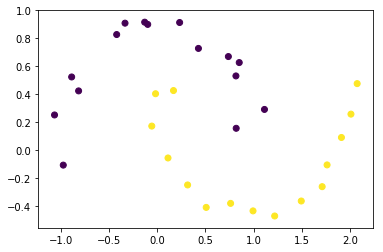

In [3]:
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=30, noise = 0.1)
# X, y = make_blobs(n_samples = 10, centers=2, cluster_std=1.2, random_state=17)
plt.scatter(X[:,0], X[:,1], c = y)
y = y.reshape((len(y), 1))

In [4]:
def add_bias(x):
    return np.concatenate((x, np.ones((x.shape[0],1))), axis=-1)


def predict(x):

    inp0 = add_bias(np.array([x]))
    
    out0 = add_bias(sigmoid(np.dot(inp0, w0)))
    inp1 = out0 
    
    out1 = add_bias(sigmoid(np.dot(inp1, w1)))
    inp2 = out1

    out = sigmoid(np.dot(inp2, w2))
    
    return out

## Обучение на каждом примере

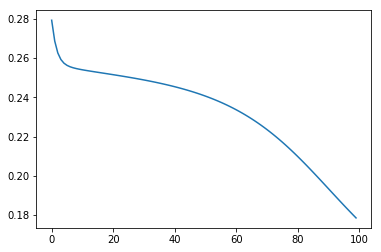

In [5]:
np.random.seed(1)
lr = 1e-1
epochs = 100

num_neurs_1 = 4 
num_neurs_2 = 4

global w0, w1, w2

w0 = 2 * np.random.random((2 + 1,num_neurs_1)) - 1

w1 = 2 * np.random.random((num_neurs_1 + 1, num_neurs_2)) - 1

w2 = 2 * np.random.random((num_neurs_2 + 1, 1)) - 1


loss = []
for i in range(epochs):
    error = []
    for x_i, y_i in zip(X, y):
        inp0 = add_bias(np.array([x_i]))
#         print('Вход 0:', l0)
        out0 = add_bias(sigmoid(np.dot(inp0, w0)))
        inp1 = out0 
#         print('Вход 1:', l1)
        out1 = add_bias(sigmoid(np.dot(inp1, w1)))
        inp2 = out1
#         print('Вход 2:', l2)
        out = sigmoid(np.dot(inp2, w2))
#         print('Выход:', l3)

        i_error = (y_i - out) ** 2
#         print('Ошибка: ', l3_error)
        error.append(i_error)
# #         if (i % 100) == 0:
# #             print(np.mean(np.abs(l3_error)))

        dfw2 = (-out + y_i) * sigmoid(out, deriv=True)

        l2_error = dfw2.dot(w2.T)

        dfw1 = np.delete(l2_error * sigmoid(inp2, deriv = True), num_neurs_2, axis=-1)

        l1_error = dfw1.dot(w1.T)

        dfw0 = np.delete(l1_error * sigmoid(inp1, deriv = True), num_neurs_1, axis=-1)

        w2 += lr * inp2.T.dot(dfw2)
        w1 += lr * inp1.T.dot(dfw1)
        w0 += lr * inp0.T.dot(dfw0)
    loss.append(np.mean(error))
plt.plot(loss)

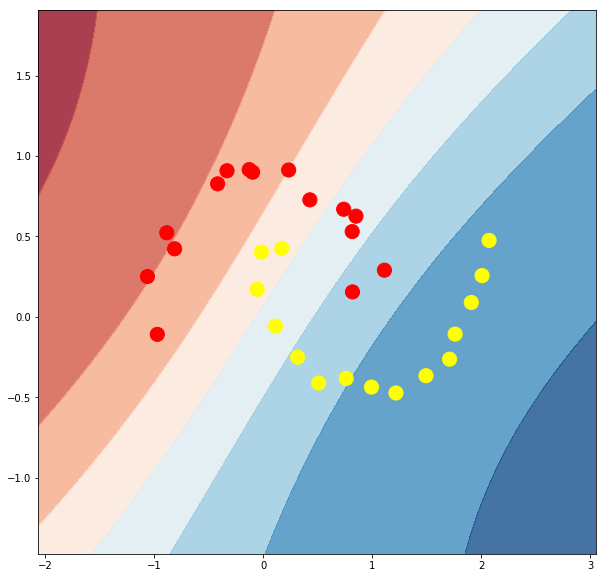

In [6]:
h = .02
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = []
for it in np.vstack((xx.ravel(), yy.ravel())).transpose():
    Z.append(predict(it))
Z = np.array(Z)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X[:,0], X[:,1], s=200, c = np.squeeze(y), cmap=plt.cm.autumn)
# plt.scatter(1.8, 1.5, s=500, c='y', marker='x')

## Обучение на батчах

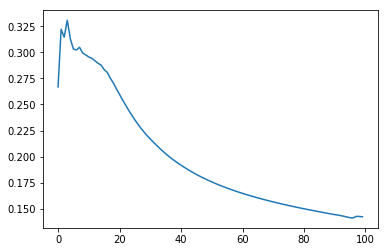

In [7]:
np.random.seed(1)
lr = 1
epochs = 100

num_neurs_1 = 8 
num_neurs_2 = 6

global w0, w1, w2

w0 = 2 * np.random.random((2 + 1,num_neurs_1)) - 1
# print('Веса скрытого слоя #1')
# print(inp0)
w1 = 2 * np.random.random((num_neurs_1 + 1, num_neurs_2)) - 1
# print('Веса скрытого слоя #2')
# print(inp1)
w2 = 2 * np.random.random((num_neurs_2 + 1, 1)) - 1
# print('Веса выходного слоя')
# print(inp1)

error = []
loss = []
for i in range(epochs):

    inp0 = add_bias(X)
#         print('Вход 0:', l0)
    out0 = add_bias(sigmoid(np.dot(inp0, w0)))
    inp1 = out0 
#         print('Вход 1:', l1)
    out1 = add_bias(sigmoid(np.dot(inp1, w1)))
    inp2 = out1
#         print('Вход 2:', l2)
    out = sigmoid(np.dot(inp2, w2))
#         print('Выход:', l3)

    i_error = (y - out) ** 2
#         print('Ошибка: ', l3_error)
    error.append(i_error)
# #         if (i % 100) == 0:
# #             print(np.mean(np.abs(l3_error)))

    dfw2 = (-out + y) * sigmoid(out, deriv=True)

    l2_error = dfw2.dot(w2.T)

    dfw1 = np.delete(l2_error * sigmoid(inp2, deriv = True), num_neurs_2, axis=-1)

    l1_error = dfw1.dot(w1.T)

    dfw0 = np.delete(l1_error * sigmoid(inp1, deriv = True), num_neurs_1, axis=-1)

    w2 += lr * inp2.T.dot(dfw2)
    w1 += lr * inp1.T.dot(dfw1)
    w0 += lr * inp0.T.dot(dfw0)
    loss.append(np.mean(error))
plt.plot(loss)

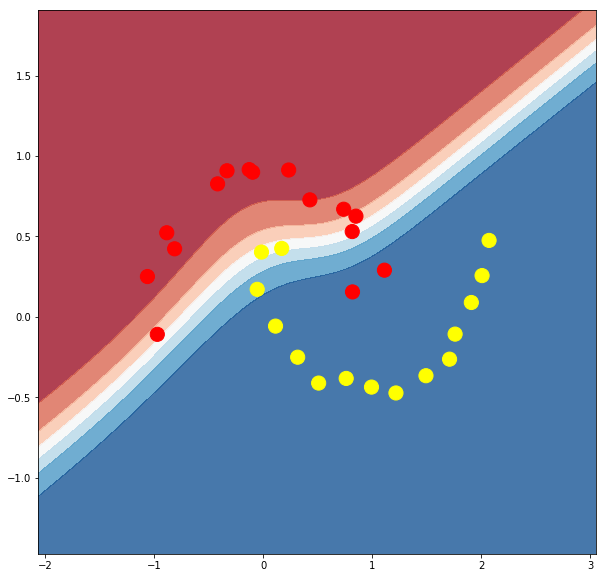

In [8]:
h = .02
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = []
for it in np.vstack((xx.ravel(), yy.ravel())).transpose():
    Z.append(predict(it))
Z = np.array(Z)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X[:,0], X[:,1], s=200, c = np.squeeze(y), cmap=plt.cm.autumn)
# plt.scatter(1.8, 1.5, s=500, c='y', marker='x')

## Softmax

In [9]:
def softmax(x, deriv = False):
    if deriv == True:
        return np.array([it * (1 - it) for it in x])
    return np.array([np.exp(it) / np.sum(np.exp(it)) for it in x])

In [10]:
Y = np.concatenate((y, np.ones(y.shape) - y), axis=1)

In [11]:
def predict(x):
    inp0 = add_bias(np.array([x]))
#         print('Вход 0:', l0)
    out0 = add_bias(sigmoid(np.dot(inp0, w0)))
    inp1 = out0 
#         print('Вход 1:', l1)
    out1 = add_bias(sigmoid(np.dot(inp1, w1)))
    inp2 = out1
#     print('Вход 2:', out1)
    out = softmax(np.dot(inp2, w2))
#     print('Выход:', out)

    return out

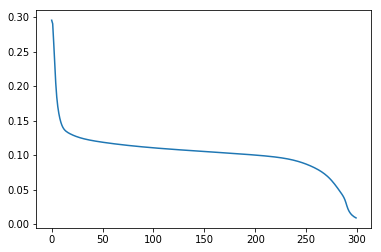

In [12]:
np.random.seed(1)
lr = 1
epochs = 300

num_neurs_1 = 8 
num_neurs_2 = 6

global w0, w1, w2

w0 = 2 * np.random.random((2 + 1,num_neurs_1)) - 1
# print('Веса скрытого слоя #1')
# print(inp0)
w1 = 2 * np.random.random((num_neurs_1 + 1, num_neurs_2)) - 1
# print('Веса скрытого слоя #2')
# print(inp1)
w2 = 2 * np.random.random((num_neurs_2 + 1, 2)) - 1
# print('Веса выходного слоя')
# print(inp1)

error = []
loss = []
for i in range(epochs):
    error = []
    for x_i, y_i in zip(X, Y):
        inp0 = add_bias(np.array([x_i]))
        
        out0 = add_bias(sigmoid(np.dot(inp0, w0)))
        inp1 = out0 

        out1 = add_bias(sigmoid(np.dot(inp1, w1)))
        inp2 = out1

        out = softmax(np.dot(inp2, w2))


        i_error = (y_i - out) ** 2


        error.append(i_error)


        dfw2 = (y_i - out) * softmax(out, deriv=True)


        l2_error = dfw2.dot(w2.T)

        dfw1 = np.delete(l2_error * sigmoid(inp2, deriv = True), num_neurs_2, axis=-1)

        l1_error = dfw1.dot(w1.T)

        dfw0 = np.delete(l1_error * sigmoid(inp1, deriv = True), num_neurs_1, axis=-1)

        w2 += lr * inp2.T.dot(dfw2)
        w1 += lr * inp1.T.dot(dfw1)
        w0 += lr * inp0.T.dot(dfw0)
    loss.append(np.mean(error))
plt.plot(loss)

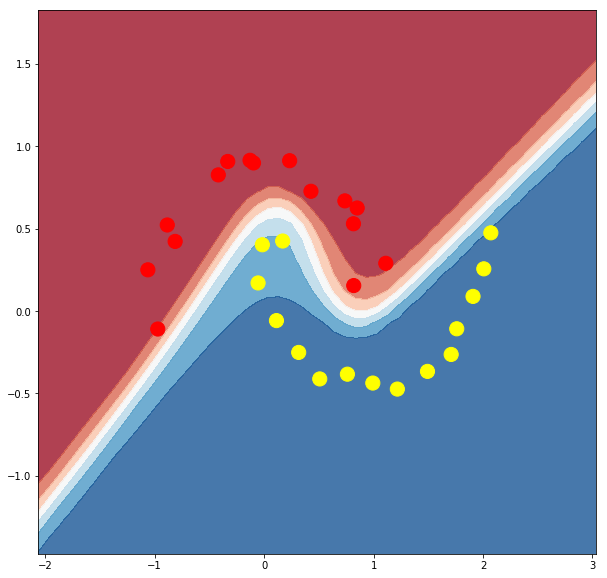

In [13]:
h = .1
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = []
for it in np.vstack((xx.ravel(), yy.ravel())).transpose():
    Z.append(predict(it))
Z = np.array(Z)
Z = Z[...,0].reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X[:,0], X[:,1], s=200, c = np.squeeze(y), cmap=plt.cm.autumn)
# plt.scatter(1.8, 1.5, s=500, c='y', marker='x')

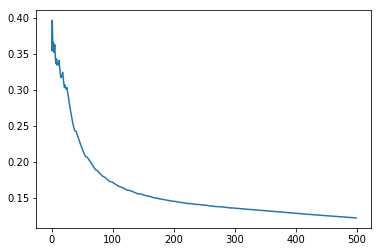

In [25]:
np.random.seed(1)

num_neurs_1 = 2 
num_neurs_2 = 2

global w0, w1, w2

w0 = 2 * np.random.random((2 + 1,num_neurs_1)) - 1
# print('Веса скрытого слоя #1')
# print(inp0)
w1 = 2 * np.random.random((num_neurs_1 + 1, num_neurs_2)) - 1
# print('Веса скрытого слоя #2')
# print(inp1)
w2 = 2 * np.random.random((num_neurs_2 + 1, 2)) - 1
# print('Веса выходного слоя')
# print(inp1)
lr = 1
epochs = 500
error = []
loss = []
for i in range(epochs):

    inp0 = add_bias(X)
#         print('Вход 0:', l0)
    out0 = add_bias(sigmoid(np.dot(inp0, w0)))
    inp1 = out0 
#         print('Вход 1:', l1)
    out1 = add_bias(sigmoid(np.dot(inp1, w1)))
    inp2 = out1
#         print('Вход 2:', l2)
    out = softmax(np.dot(inp2, w2))
#         print('Выход:', l3)

    i_error = (out - Y) ** 2
#         print('Ошибка: ', l3_error)
    error.append(i_error)
# #         if (i % 100) == 0:
# #             print(np.mean(np.abs(l3_error)))

    dfw2 = (Y - out) * softmax(out, deriv=True)

    l2_error = dfw2.dot(w2.T)

    dfw1 = np.delete(l2_error * sigmoid(inp2, deriv = True), num_neurs_2, axis=-1)

    l1_error = dfw1.dot(w1.T)

    dfw0 = np.delete(l1_error * sigmoid(inp1, deriv = True), num_neurs_1, axis=-1)

    w2 += lr * inp2.T.dot(dfw2)
    w1 += lr * inp1.T.dot(dfw1)
    w0 += lr * inp0.T.dot(dfw0)
    loss.append(np.mean(error))
plt.plot(loss)

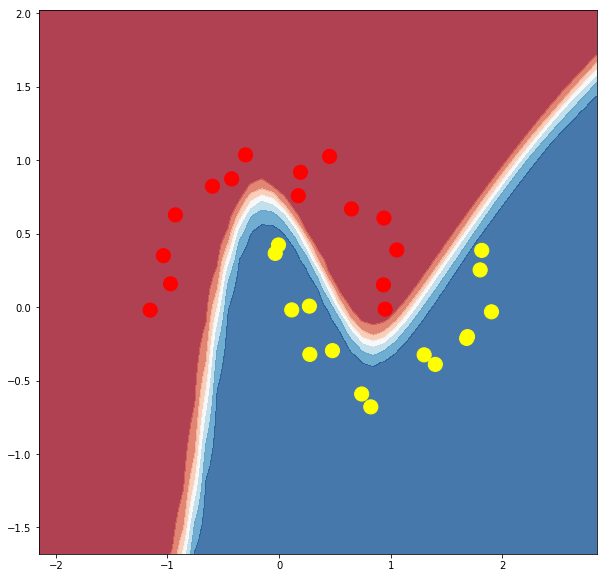

In [65]:
h = .1
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = []
for it in np.vstack((xx.ravel(), yy.ravel())).transpose():
    Z.append(predict(it))
Z = np.array(Z)
Z = Z[...,0].reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X[:,0], X[:,1], s=200, c = np.squeeze(y), cmap=plt.cm.autumn)
# plt.scatter(1.8, 1.5, s=500, c='y', marker='x')

## Softmax + Crossentropy

In [67]:
def crossentropy(y, x, deriv = False, epsilon = 1e-12):
    x = np.clip(x, epsilon, 1. - epsilon)
    if deriv == True:
        return - y / x + (1 - y) / (1 - x)

    return - np.sum(y * np.log(x) + (1 - y) * np.log(1 - x) , axis = 1) / x.shape[1]

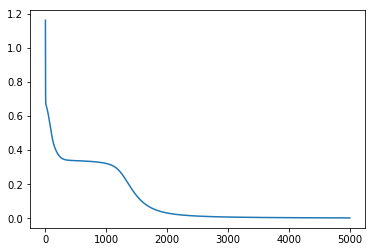

In [68]:
np.random.seed(1)

num_neurs_1 = 8 
num_neurs_2 = 6

global w0, w1, w2

w0 = 2 * np.random.random((2 + 1,num_neurs_1)) - 1
# print('Веса скрытого слоя #1')
# print(inp0)
w1 = 2 * np.random.random((num_neurs_1 + 1, num_neurs_2)) - 1
# print('Веса скрытого слоя #2')
# print(inp1)
w2 = 2 * np.random.random((num_neurs_2 + 1, 2)) - 1
# print('Веса выходного слоя')
# print(inp1)
lr = 1e-2
epochs = 5000
error = []
loss = []
for i in range(epochs):

    inp0 = add_bias(X)
#         print('Вход 0:', l0)
    out0 = add_bias(sigmoid(np.dot(inp0, w0)))
    inp1 = out0 
#         print('Вход 1:', l1)
    out1 = add_bias(sigmoid(np.dot(inp1, w1)))
    inp2 = out1
#         print('Вход 2:', l2)
    out = softmax(np.dot(inp2, w2))
#         print('Выход:', l3)

    i_error = crossentropy(Y, out)
#         print('Ошибка: ', l3_error)
    error.append(np.mean(i_error))
# #         if (i % 100) == 0:
# #             print(np.mean(np.abs(l3_error)))

    dfw2 = -crossentropy(Y, out, deriv=True) * softmax(out, deriv=True)

    l2_error = dfw2.dot(w2.T)

    dfw1 = np.delete(l2_error * sigmoid(inp2, deriv = True), num_neurs_2, axis=-1)

    l1_error = dfw1.dot(w1.T)

    dfw0 = np.delete(l1_error * sigmoid(inp1, deriv = True), num_neurs_1, axis=-1)

    w2 += lr * inp2.T.dot(dfw2)
    w1 += lr * inp1.T.dot(dfw1)
    w0 += lr * inp0.T.dot(dfw0)
plt.plot(error)

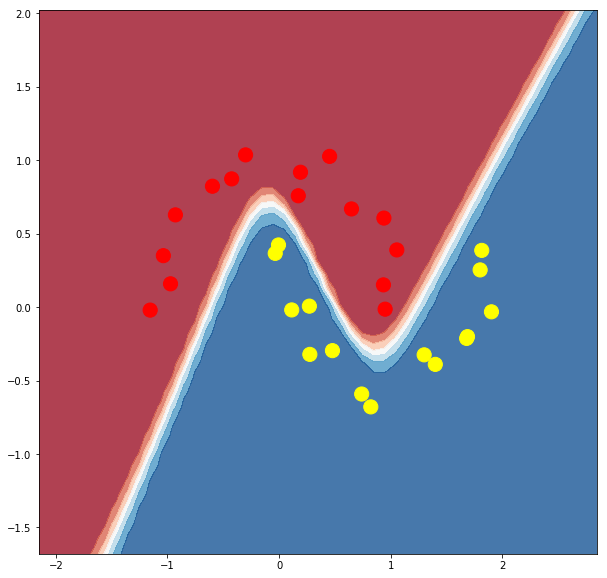

In [69]:
h = .1
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = []
for it in np.vstack((xx.ravel(), yy.ravel())).transpose():
    Z.append(predict(it))
Z = np.array(Z)
Z = Z[...,0].reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X[:,0], X[:,1], s=200, c = np.squeeze(y), cmap=plt.cm.autumn)
# plt.scatter(1.8, 1.5, s=500, c='y', marker='x')

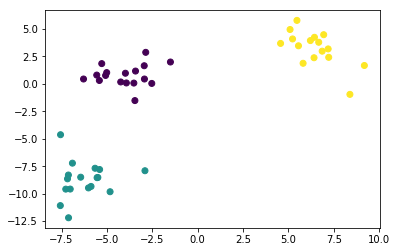

In [70]:
X, y = make_blobs(n_samples = 50, centers=3, cluster_std=1.2, random_state=17)
plt.scatter(X[:,0], X[:,1], c = y)
y = y.reshape((len(y), 1))
Y = np.concatenate((y == 0, y == 1, y == 2), axis=1).astype(int)

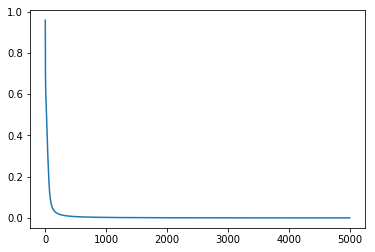

In [71]:
np.random.seed(1)

num_neurs_1 = 8 
num_neurs_2 = 6

global w0, w1, w2

w0 = 2 * np.random.random((2 + 1,num_neurs_1)) - 1
# print('Веса скрытого слоя #1')
# print(inp0)
w1 = 2 * np.random.random((num_neurs_1 + 1, num_neurs_2)) - 1
# print('Веса скрытого слоя #2')
# print(inp1)
w2 = 2 * np.random.random((num_neurs_2 + 1, 3)) - 1
# print('Веса выходного слоя')
# print(inp1)
lr = 1e-2
epochs = 5000
error = []
loss = []
for i in range(epochs):

    inp0 = add_bias(X)
#         print('Вход 0:', l0)
    out0 = add_bias(sigmoid(np.dot(inp0, w0)))
    inp1 = out0 
#         print('Вход 1:', l1)
    out1 = add_bias(sigmoid(np.dot(inp1, w1)))
    inp2 = out1
#         print('Вход 2:', l2)
    out = softmax(np.dot(inp2, w2))
#         print('Выход:', l3)

    i_error = crossentropy(Y, out)
#         print('Ошибка: ', l3_error)
    error.append(np.mean(i_error))
# #         if (i % 100) == 0:
# #             print(np.mean(np.abs(l3_error)))

    dfw2 = -crossentropy(Y, out, deriv=True) * softmax(out, deriv=True)

    l2_error = dfw2.dot(w2.T)

    dfw1 = np.delete(l2_error * sigmoid(inp2, deriv = True), num_neurs_2, axis=-1)

    l1_error = dfw1.dot(w1.T)

    dfw0 = np.delete(l1_error * sigmoid(inp1, deriv = True), num_neurs_1, axis=-1)

    w2 += lr * inp2.T.dot(dfw2)
    w1 += lr * inp1.T.dot(dfw1)
    w0 += lr * inp0.T.dot(dfw0)
plt.plot(error)

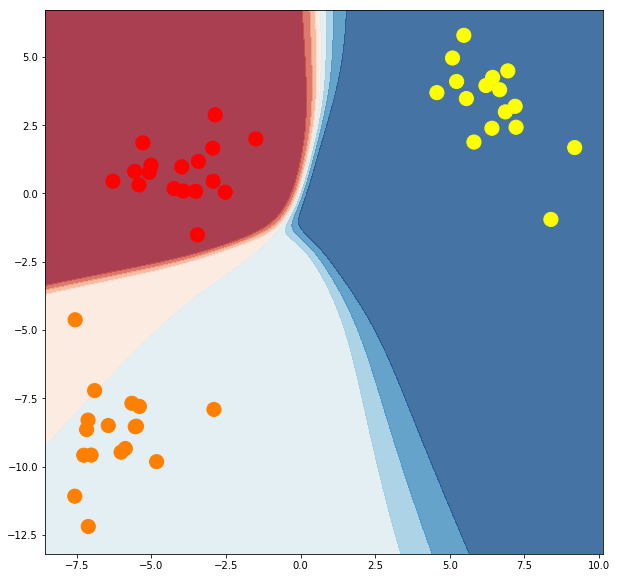

In [72]:
h = .1
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = []
for it in np.vstack((xx.ravel(), yy.ravel())).transpose():
    Z.append(predict(it))
Z = np.array(Z)
z = np.array([ 0* obj[0] + 1* obj[1] + 2* obj[2]  for obj in np.squeeze(Z)])
z = z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X[:,0], X[:,1], s=200, c = np.squeeze(y), cmap=plt.cm.autumn)
# # plt.scatter(1.8, 1.5, s=500, c='y', marker='x')

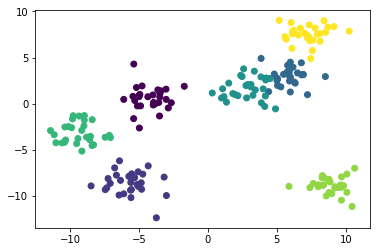

In [85]:
X, y = make_blobs(n_samples = 200, centers=7, cluster_std=1.1, random_state=17)
plt.scatter(X[:,0], X[:,1], c = y)
y = y.reshape((len(y), 1))
Y = np.concatenate((y == 0, y == 1, y == 2, y == 3, y == 4,  y == 5,  y == 6), axis = 1).astype(int)

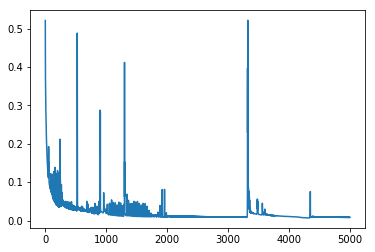

In [91]:
np.random.seed(1)

num_neurs_1 = 10 
num_neurs_2 = 10

global w0, w1, w2

w0 = 2 * np.random.random((2 + 1,num_neurs_1)) - 1
# print('Веса скрытого слоя #1')
# print(inp0)
w1 = 2 * np.random.random((num_neurs_1 + 1, num_neurs_2)) - 1
# print('Веса скрытого слоя #2')
# print(inp1)
w2 = 2 * np.random.random((num_neurs_2 + 1, Y.shape[1])) - 1
# print('Веса выходного слоя')
# print(inp1)
lr = 1e-2
epochs = 5000
error = []
loss = []
for i in range(epochs):

    inp0 = add_bias(X)
#         print('Вход 0:', l0)
    out0 = add_bias(sigmoid(np.dot(inp0, w0)))
    inp1 = out0 
#         print('Вход 1:', l1)
    out1 = add_bias(sigmoid(np.dot(inp1, w1)))
    inp2 = out1
#         print('Вход 2:', l2)
    out = softmax(np.dot(inp2, w2))
#         print('Выход:', l3)

    i_error = crossentropy(Y, out)
#         print('Ошибка: ', l3_error)
    error.append(np.mean(i_error))
# #         if (i % 100) == 0:
# #             print(np.mean(np.abs(l3_error)))

    dfw2 = -crossentropy(Y, out, deriv=True) * softmax(out, deriv=True)

    l2_error = dfw2.dot(w2.T)

    dfw1 = np.delete(l2_error * sigmoid(inp2, deriv = True), num_neurs_2, axis=-1)

    l1_error = dfw1.dot(w1.T)

    dfw0 = np.delete(l1_error * sigmoid(inp1, deriv = True), num_neurs_1, axis=-1)

    w2 += lr * inp2.T.dot(dfw2)
    w1 += lr * inp1.T.dot(dfw1)
    w0 += lr * inp0.T.dot(dfw0)
plt.plot(error)

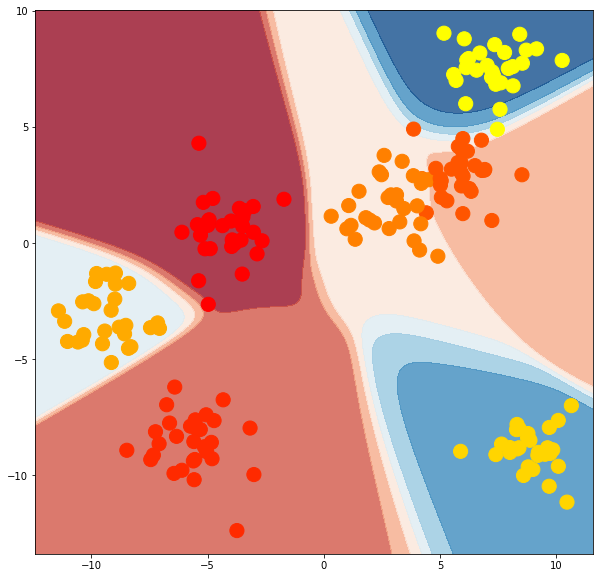

In [90]:
h = .1
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = []
for it in np.vstack((xx.ravel(), yy.ravel())).transpose():
    Z.append(predict(it))
Z = np.array(Z)
z = np.array([ 0* obj[0] + 1* obj[1] + 2* obj[2] + 3 * obj[3] + 4 * obj[4] + 5 * obj[5] + 6 * obj[6] for obj in np.squeeze(Z)])
z = z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X[:,0], X[:,1], s=200, c = np.squeeze(y), cmap=plt.cm.autumn)
# # plt.scatter(1.8, 1.5, s=500, c='y', marker='x')